<h1 style = "background:lightblue;border:0"> Introduction </h1>

<p style = "font-size: 16px;text-indent:15px;">Fifa is one of the most played console games in the world. Fifa 21 is a series of this. Fifa 21 is a soccer game.FIFA 21 is a football simulation video game published by Electronic Arts as part of the FIFA series. It is the 28th installment in the FIFA series, and was released on 9 October 2020 for Microsoft Windows, Nintendo Switch, PlayStation 4 and Xbox One. Enhanced versions for the PlayStation 5 and Xbox Series X and Series S were released on 3 December 2020, in addition to a version for Stadia. I performed Exploratory Data Analysis using the Fifa 21 data set. Later, I made visualizations using matplotlib & seaborn libraries.</p>

<h2 style = "background:lightblue;border:0"> Content : </h2>

1. [Importing our libraries for EDA](#0)
    * [Correlation](#20)
    * [Pair Plot](#21)
    * [WordCloud Of Nationality](#22)
    * [Who are the Top Players in FIFA 2021?](#23)
    * [Which foot does the footballers in fifa 21 use more?](#24)
    * [Top 3 Footballers with the Highest Wage & Nationality of this footballers](#25)
    * [Age Distribution of FIFA players](#27)
    * [Skill move Distribution](#28)
    * [Top 10 countries with the most footballers](#29)
    
    





<a id ='0' ></a>
<h1 style = "background:lightblue;border:0"> Importing our libraries for EDA </h1>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt #visualize
plt.style.use("seaborn-whitegrid")

import seaborn as sns #visualize

from collections import Counter

import warnings # don't show warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
%matplotlib inline

<a id ='1' ></a>
<h1 style = "background:lightblue;border:0"> Load and Check Data </h1>

In [2]:
#Reading Our Dataset with Pandas Library
data_fifa = pd.read_csv("players.csv")
data_fifa.sample(8)

,int_player_id,str_player_name,str_positions,dt_date_of_birth,int_height,int_weight,int_overall_rating,int_potential_rating,str_best_position,int_best_overall_rating,...,int_international_reputations,str_work_rate,str_body_type,int_dribbling,int_curve,int_fk_accuracy,int_long_passing,int_ball_control,str_player_speciality,str_trait
11904,11905,Helge Valvatne Sandvik,GK,2/5/1990,183,75,64,65,GK,64,...,1,Medium/ Medium,Normal (170-185),22,20,21,29,28,NaN,NaN
732,733,Everton Jorge Simão Resende,"RB, RM, CM",2/29/2000,176,75,78,78,RB,78,...,1,Medium/ Medium,Normal (170-185),76,76,68,59,75,NaN,"['Early Crosser', 'Chip Shot (AI)']"
11111,11112,Damian Węglarz,GK,3/21/1996,189,82,64,68,GK,64,...,1,Medium/ Medium,Normal (185+),17,13,13,20,20,NaN,NaN
12418,12419,Callum Styles,"CM, CAM",3/27/2000,167,60,63,74,CAM,66,...,1,Medium/ Medium,Normal (170-),65,54,44,65,65,NaN,['Playmaker (AI)']
299,300,Gonçalo Manuel Ganchinho Guedes,"LM, ST, CAM",11/29/1996,179,68,81,87,LM,81,...,2,High/ Low,Normal (170-185),83,76,70,69,80,NaN,"['Injury Prone', 'Flair', 'Long Shot Taker (AI..."
5839,5840,Emmanuel Afriyie Mario Sabbi,RM,12/24/1997,178,70,69,78,CAM,70,...,1,Medium/ Low,Lean (170-185),75,58,43,51,73,"['Speedster', 'Acrobat']","['Flair', 'Speed Dribbler (AI)', 'Technical Dr..."
17817,17818,Yahya Kalley,"LB, LM",3/20/2001,181,63,55,67,LB,55,...,1,High/ Medium,Lean (170-185),53,30,34,42,50,NaN,NaN
1173,1174,Alexander Djiku,"CB, CM, CDM",8/9/1994,182,81,77,80,CB,79,...,1,Medium/ High,Normal (170-185),70,57,43,65,73,NaN,NaN


<a id ='2' ></a>
<h1 style = "background:lightblue;border:0">Variable Description</h1>

1. **ID** : unique id number to each footballer
2. **Name** : name of footballer
3. **Age** : age of footballer
4. **Photo** : photo of footballer
5. **Nationality** : the nationality of the player
6. **Overall** : in-game power
7. **Potential** : the potential of the football player
8. **Clup**: football player's club
9. **Value** : value of the player
10. **Wage** : wages paid by the player
11. **Special** : special
12. **Preferred Foot** : foot used by the footballer(left,Right)
13. **International Reputation** : the international reputation of the football player
14. **Weak Foot** : weak foot of the footballer
15. **Skill Moves** : football player's skills moves
16. **Work Rate** : football player's work rate
17. **Body Type** : body type of the football player
18. **Real Face** : real face of the player(false,true)
19. **Position** : position played by the football player
20. **Jersey Number** : jersey number of the football player
21. **Joined** : Joined
22. **Loaned From** : is the football player for loaned from
23. **Contract Valid Until** : the expiry date of the player contract
24. **Height** : footballer's height
25. **Weight** : footballer's weight
26. **Crossing** : long cross pass by the footballer
27. **Finishing** : football player finishing
28. **HeadingAccuracy** : HeadingAccuracy
29. **ShortPassing** : ShortPassing
30. **Dribbling** : player's dribbling speed
31. **Curve** : spin on the ball
32. **LongPassing** : football player's long pass
33. **BallControl** : football player control the ball
34. **Acceleration** : the speed of the football player
35. **SprintSpeed** : the sprintSpeed of the player
36. **Agility** : the agility of the football player
37. **Reactions** : the reaction of the footballer
38. **Balance** : football player's balance
39. **ShotPower** : football player's shotpower
40. **Jumping** : the footballer's jumping capacity
41. **Stamina** : the footballer's stamina
42. **Strength** : the strength of the football player
43. **LongShots** : footballer's longest shot
44. **Aggression** : football player's aggression
45. **Positioning** : the position of the football player in the football field
46. **Vision** : football player vision
47. **Penalties** : footballer's penalties
48. **Composure** : the calmness of the football player on the field
49. **Marking** : marking
50. **StandingTackle** : the fight of the football player
51. **SlidingTackle** : slide intervention
52. **GKDiving** : diving
53. **GKHandling** : handling
54. **GKKicking** : kicking
55. **GKPositioning** : Positioning
56. **GKReflexes** : reflexes
57. **Release Clause** : the player's release clause

    **Football Player Position** : LS, ST, RS, LW, LF, CF, RF, RW, LAM, 
    CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, BC, RCB, RB. 







<a id ='18' ></a>
<h1 style = "background:lightblue;border:0">Most Paid Players</h1>

In [3]:
# Renaming the Columns in Dataset in a suitable Pythonic way
data_fifa = data_fifa.rename(columns = {'str_player_name': 'PlayerName', 'str_positions': 'Positions',
                                       'dt_date_of_birth': 'D.O.B', 'int_height': 'PlayerHeight',
                                       'int_weight': 'PlayerWeight', 'int_overall_rating': 'OverallRating',
                                       'int_potential_rating': 'PotentialRating', 'str_best_position': 'BestPositions',
                                       'int_best_overall_rating': 'BestOverallRating', 'int_value': 'PlayerValue',
                                       'int_wage': 'Wage', 'str_nationality': 'Nationality',
                                       'int_crossing': 'Crossing', 'int_finishing': 'FinishingAccuracy',
                                       'int_heading_accuracy': 'HeadingAccuracy', 'int_short_passing': 'ShortPassing',
                                       'int_volleys': 'Volleys', 'int_defensive_awareness': 'DefensiveAwareness',
                                       'int_standing_tackle': 'StandingTackle', 'int_sliding_tackle': 'SlidingTackle',
                                       'int_diving': 'Diving', 'int_handling': 'Handling',
                                       'int_kicking': 'Kicking', 'int_gk_positioning': 'GkPositioning',
                                       'int_reflexes': 'Reflexes', 'int_aggression': 'Aggression',
                                       'int_interceptions': 'Interceptions', 'int_positioning': 'Positioning',
                                       'int_vision': 'Vision', 'int_penalties': 'Penalties',
                                       'int_composure': 'Composure', 'int_acceleration': 'Acceleration',
                                       'int_sprint_speed': 'SprintSpeed', 'int_agility': 'Agility',
                                       'int_reactions': 'Reactions', 'int_balance': 'Balance',
                                       'int_shot_power': 'ShotPower', 'int_jumping': 'JumpingPower',
                                       'int_stamina': 'Stamina', 'int_strength': 'Strength',
                                       'int_long_shots': 'LongShots', 'str_preferred_foot': 'PreferredFoot',
                                        'int_weak_foot': 'WeakFoot', 'int_skill_moves': 'SkillMoves',
                                       'int_international_reputations': 'InternationalReputations', 'str_work_rate': 'WorkRate',
                                       'str_body_type': 'BodyType', 'int_dribbling': 'Dribbling',
                                       'int_curve': 'Curve', 'int_fk_accuracy': 'FreekickAccuracy',
                                       'int_long_passing': 'LongPassing', 'int_ball_control': 'BallControl'}, inplace = False)

<a id ='20' ></a>
<h1 style = "background:lightblue;border:0">Correlation</h1>

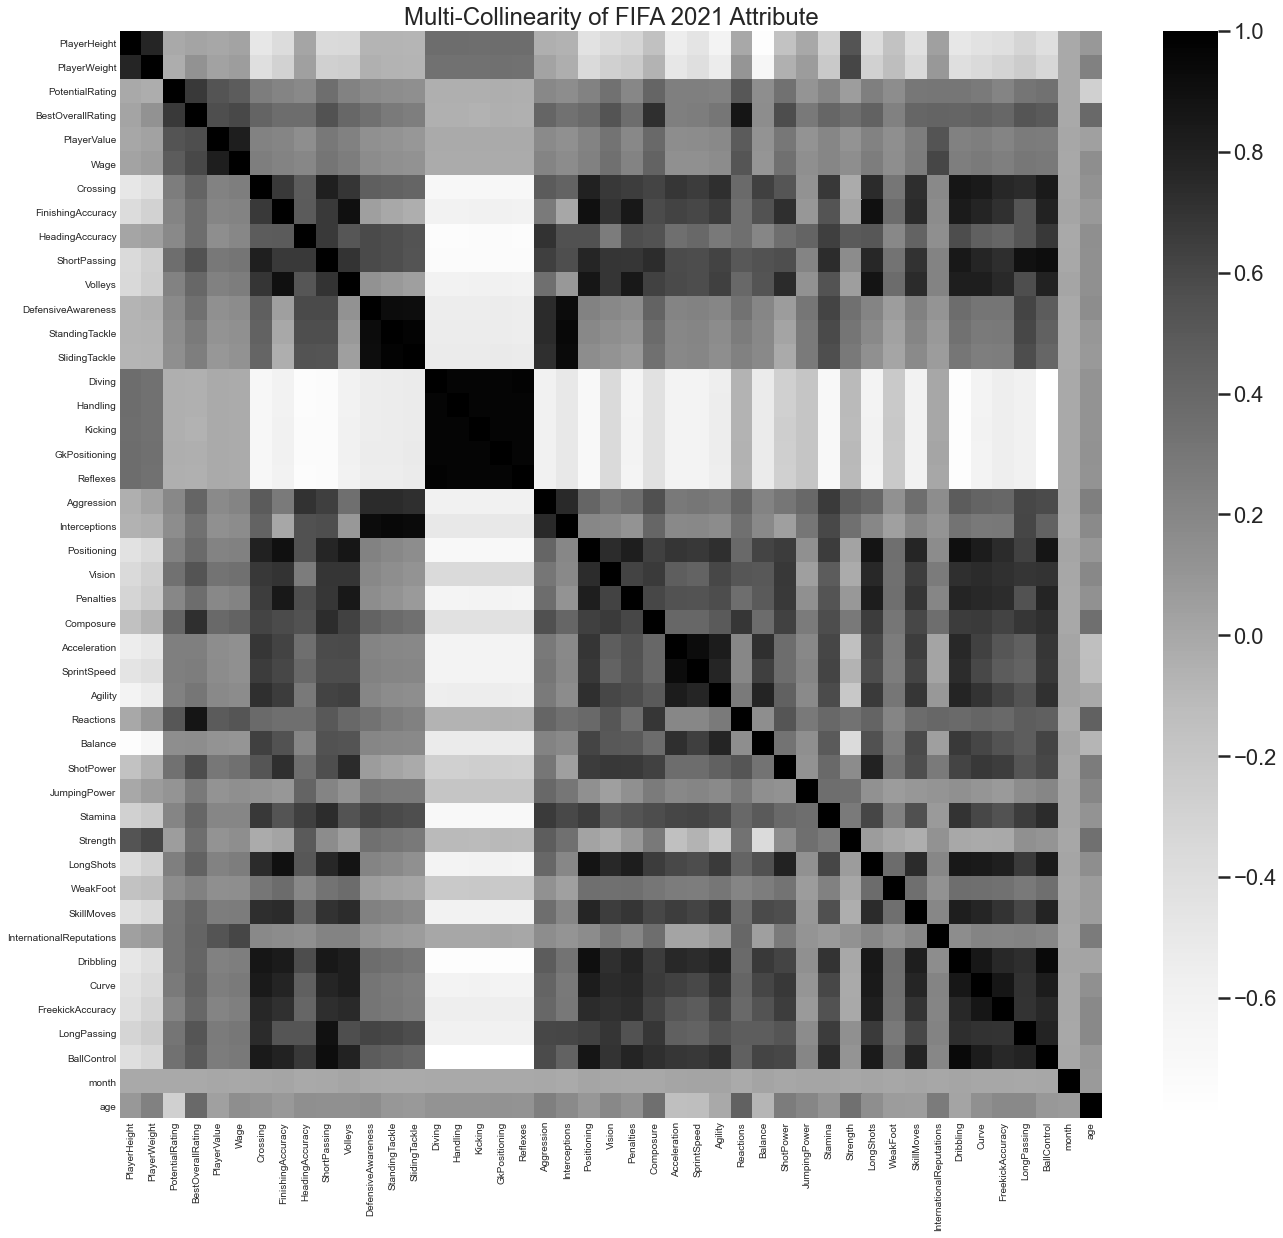

In [10]:
fig, ax = plt.subplots(figsize=(22,20))#This will set the Width and Height of our visuals
sns.set_context('poster')#This affects things like the size of the labels, lines, and other elements of the plot
corr = data_fifa.corr()#Extent Of Correlation in our Dataset
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='Greys')#Heatmap Declaration & visualization
ax.set_title('Multi-Collinearity of FIFA 2021 Attribute')#Title for Our Graph
plt.savefig('heatmap.png')

<a id ='21' ></a>
<h1 style = "background:lightblue;border:0">Pair Plot</h1>

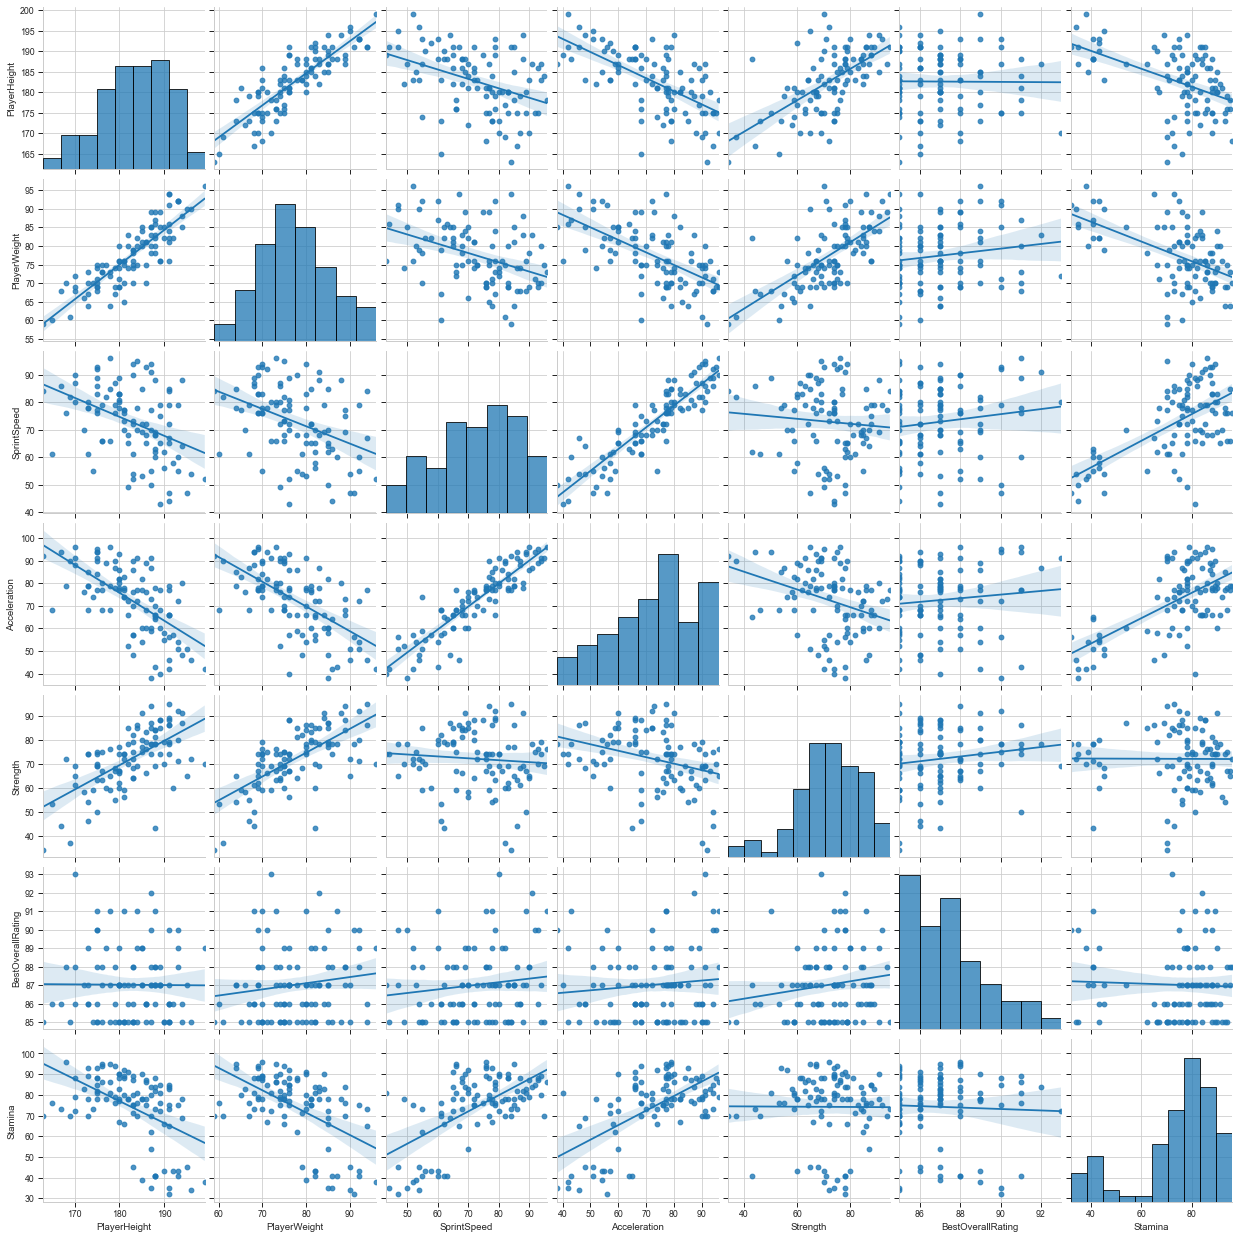

In [5]:
# relationship between player acceleration and SprintSpeed
"""
I used the ready data above to show you this graph.
data_speed(Acceleration, SprintSpeed)
data_lm = I chose 150 data to make it look clearer

the line inside the graph passes through the middle of the points.

what the line shows us ?
sprint increases when acceleration increases.
"""
sns.set_context('paper')
data_lm = data_fifa.head(100)
sns.pairplot(data_lm, vars=['PlayerHeight','PlayerWeight','SprintSpeed','Acceleration','Strength','BestOverallRating','Stamina'],kind='reg')
plt.savefig('pairplot.png')

<a id ='22' ></a>
<h1 style = "background:lightblue;border:0">WordCloud Of Nationality</h1>

(-0.5, 1999.5, 1199.5, -0.5)

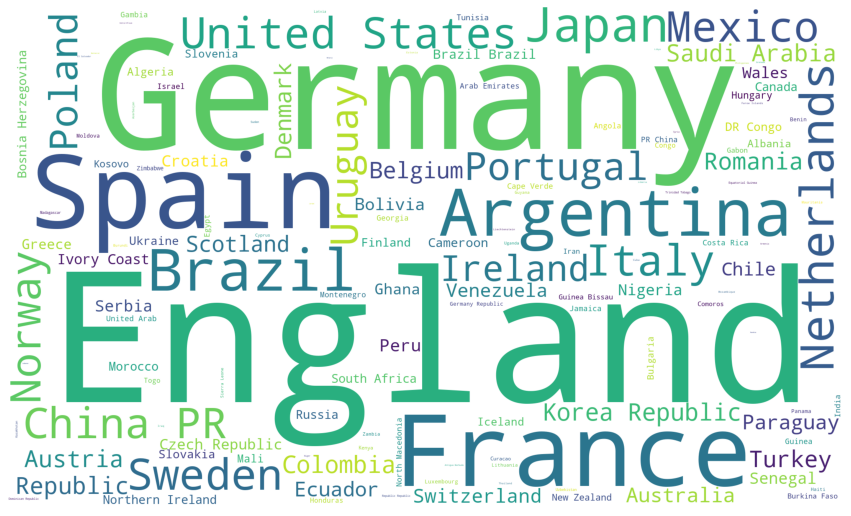

In [20]:
#WordCloud Of Nationality
d_frame = data_fifa.Nationality

plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                   background_color='white',
                        width = 2000,
                        height = 1200
    ).generate(" ".join(d_frame))

plt.imshow(wordcloud)
plt.axis('off')

In [11]:
data_fifa.groupby("Nationality").PlayerName.count().sort_values(ascending=False).head(10)/100

Nationality
England          17.05
Germany          11.99
Spain            10.63
France           10.02
Argentina         9.32
Brazil            8.94
Japan             4.83
Netherlands       4.46
United States     3.81
Sweden            3.81
Name: PlayerName, dtype: float64

<a id ='23' ></a>
<h1 style = "background:lightblue;border:0">Who are the Top Players in FIFA 2021?</h1>

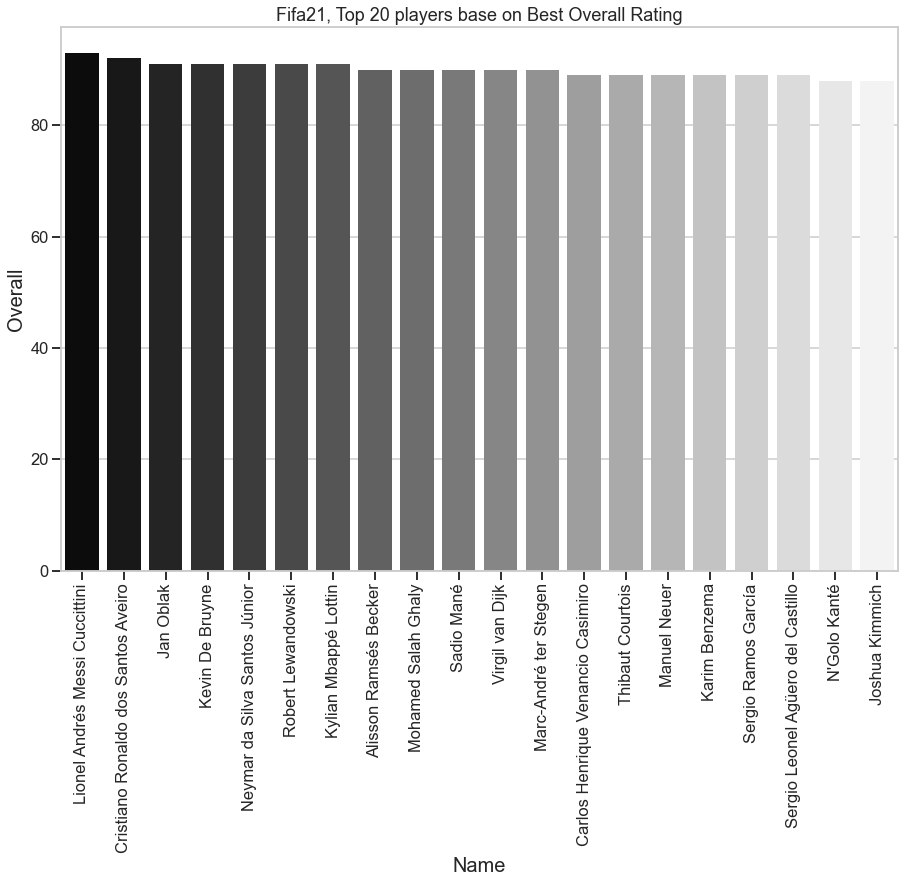

In [12]:
# problem : Top 20 players overall
# We get the names and overals from the data
Overall = data_fifa["BestOverallRating"]
footballer_name = data_fifa["PlayerName"]

# We create dataframe(Name,Overall)
data = pd.DataFrame({'PlayerName': footballer_name,'BestOverallRating':Overall})
"""
data = { example = (messi : 94) }
"""
x = data.PlayerName.head(20)  # comes in order from large to small
y = data.BestOverallRating.head(20)

# visualize
sns.set_context('talk')
plt.figure(figsize=(15,10))
"""
cubehelix_palette = This produces a colormap with linearly-decreasing (or increasing) brightness.
(sets according to the number of data)
"""
ax= sns.barplot(x=x, y=y,palette ='gray') # x = Name, y = Overall
plt.xticks(rotation= 90)
plt.xlabel('Name', size = 20) # x-axis name
plt.ylabel('Overall', size = 20 ) # y-axis name
plt.title('Fifa21, Top 20 players base on Best Overall Rating') # title
plt.show()
#plt.savefig('Top20.png')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.1, p.get_height()+30))



<a id ='24' ></a>
<h1 style = "background:lightblue;border:0">Which foot does the footballers in fifa 21 use more?</h1>

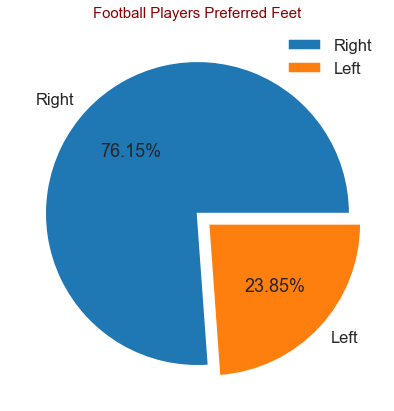

In [17]:
# Which foot does the footballers in fifa 21 use more?
preferred_foot_labels = data_fifa["PreferredFoot"].value_counts().index # (Right,Left) 
preferred_foot_values = data_fifa["PreferredFoot"].value_counts().values # (Right Values, Left Values)
explode = (0, 0.1) # used to separate a slice of cake

# Visualize
plt.figure(figsize = (7,7))
plt.pie(preferred_foot_values, labels=preferred_foot_labels,explode=explode, autopct='%1.2f%%')
plt.title('Football Players Preferred Feet',color = 'darkred',fontsize = 15)
plt.legend()
#plt.show()
plt.savefig('Piechart.jpg')

# Top 3 Footballers with the Highest Wage & Nationality of this footballers

<a id ='25' ></a>
<h1 style = "background:lightblue;border:0">Top 3 Footballers with the Highest Wage & Nationality of this footballers</h1>

Text(0.5, 0, 'Total wages')

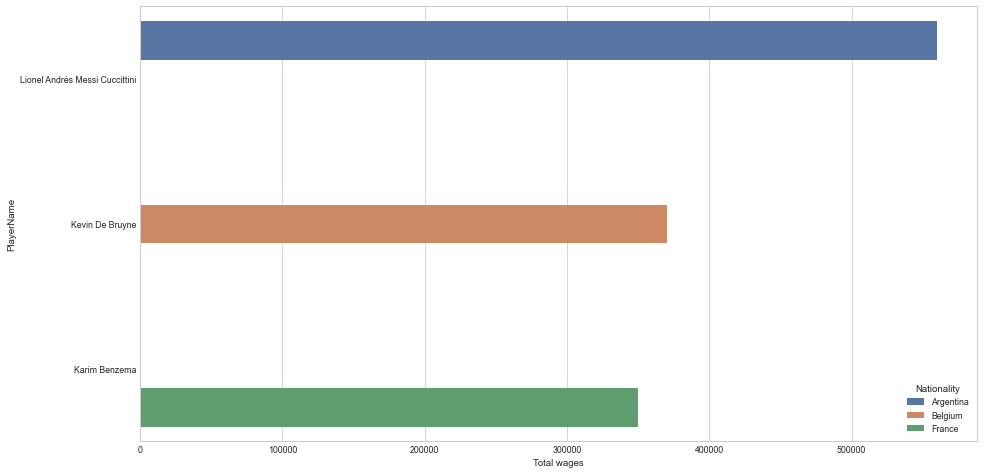

In [181]:
#Players with the highest wages
plt.figure(figsize=(15,8))
player_name = data_fifa.nlargest(3, ['Wage']).set_index('PlayerName')
sns.barplot(player_name['Wage'], player_name.index, ci = None, hue = player_name['Nationality'],palette="deep")
plt.xlabel('Total wages')

<a id ='26' ></a>
<h1 style = "background:lightblue;border:0">Most Valuable Players</h1>

# Most Valuable Player as at 2021

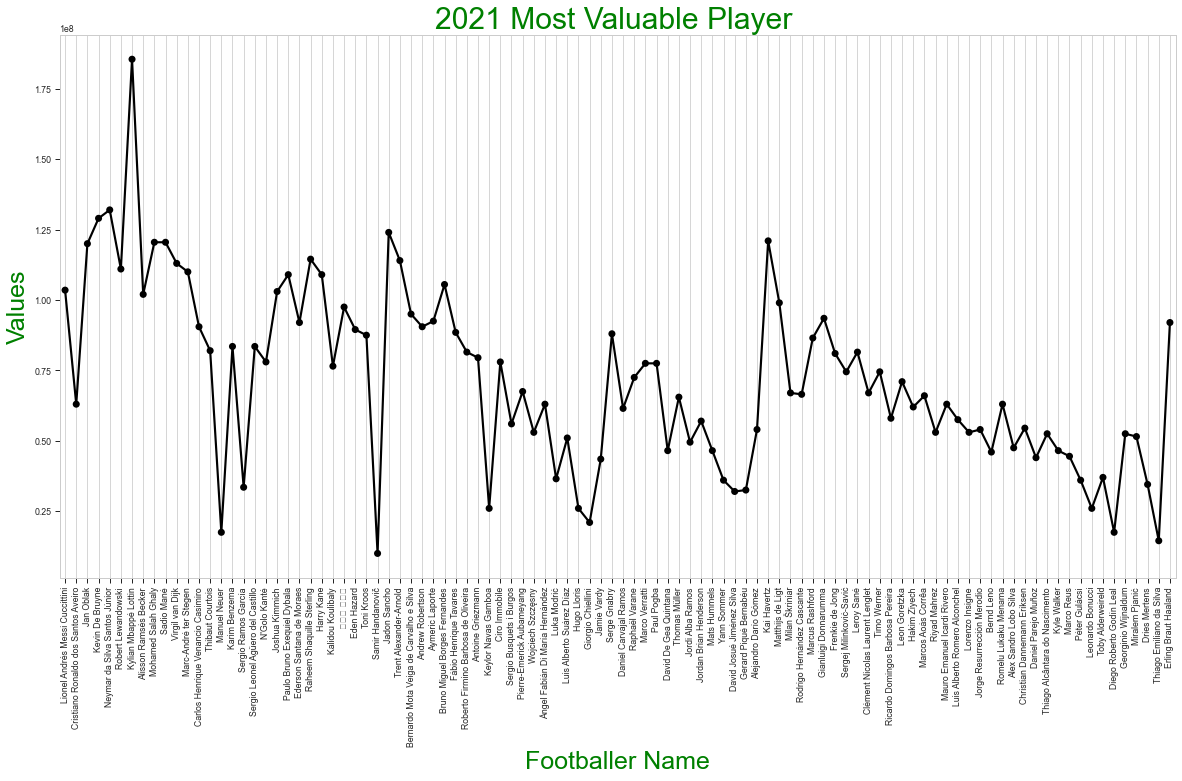

In [21]:
# Market Value of a Player ?(for 45 players)
sns.set_context('paper')
value = list(data_fifa["PlayerValue"]) 
#value = [float(each.replace('€','').replace('M','').replace('K','')) for each in value]    
name = data_fifa["PlayerName"]

data = pd.DataFrame({ 'PlayerValue' : value,'PlayerName':name})

x = data.PlayerName.head(100)
value_y = data.PlayerValue.head(100) # value_y = footballer value(30 players)

# visualize
f,ax1 = plt.subplots(figsize =(20,10))

sns.pointplot(x=x,y=value_y,color='black',alpha=0.9) # alpha = transparency(0) or opacity(1)

plt.xticks(rotation= 90) # Position of text on the x-axis

plt.xlabel('Footballer Name',fontsize = 25,color='green') # x-axis name

plt.ylabel('Values',fontsize = 25,color='green') # y-axis name

plt.title('2021 Most Valuable Player ',fontsize = 30,color='green') # title
plt.grid()

<a id ='27' ></a>
<h1 style = "background:lightblue;border:0">Age Distribution of FIFA players</h1>

In [7]:
#Converting Our Datatime column to Numerical Column @year e.g 1996 and @Month e.g 11th month
data_fifa['D.O.B'] = pd.to_datetime(data_fifa['D.O.B'])
data_fifa['year']= data_fifa['D.O.B'].dt.year
data_fifa['month']= data_fifa['D.O.B'].dt.month

#Subtract 2021 from Date Of Birth to get Age
today = pd.to_datetime('2021-03-10')
data_fifa['age'] = today.year - data_fifa['D.O.B'].dt.year

# Fifa 21 Player's Age Distribution

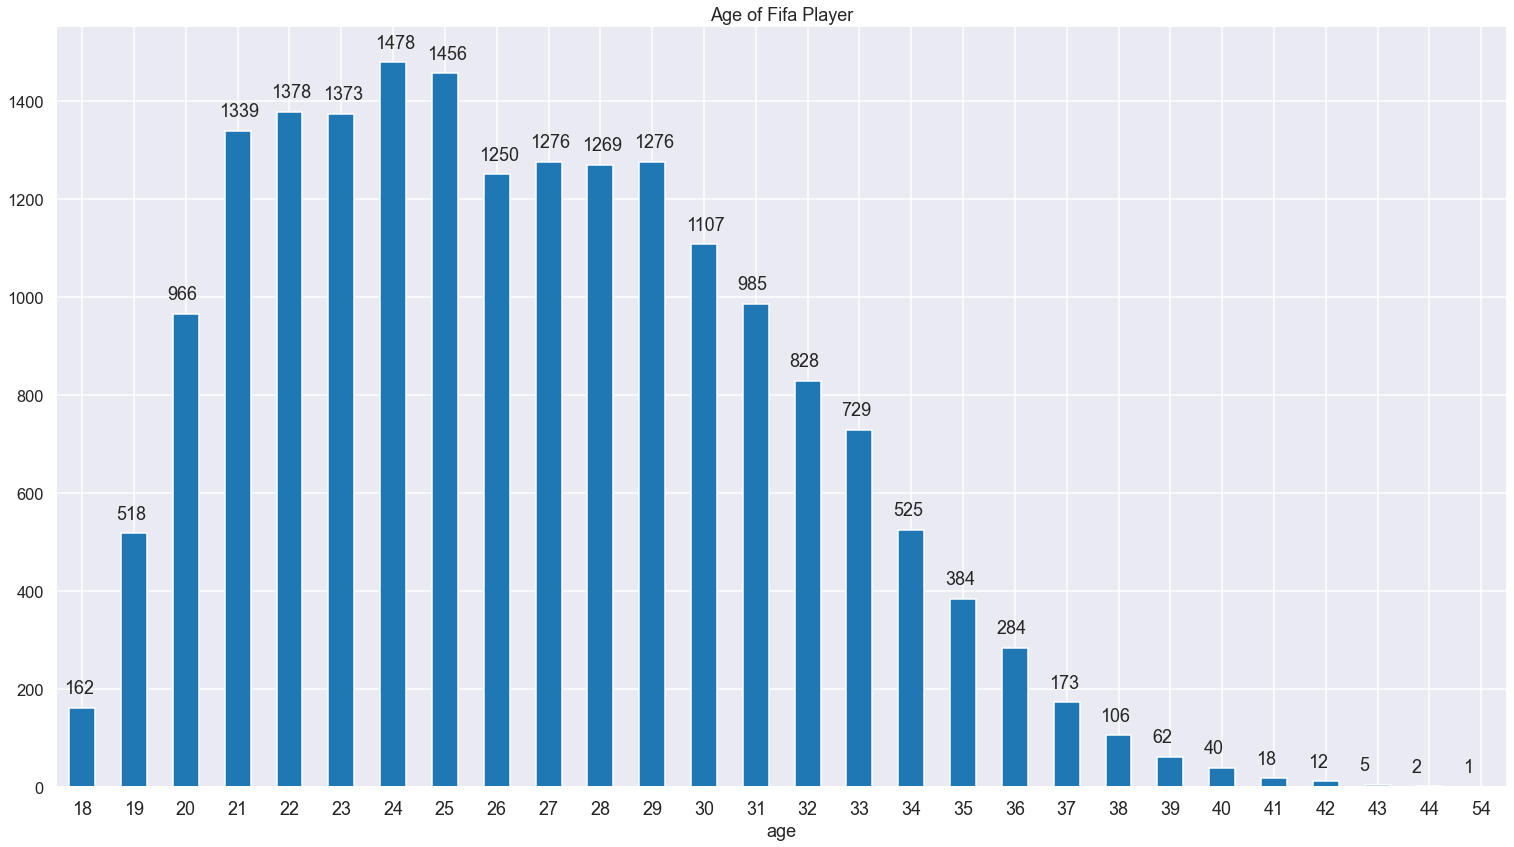

In [8]:
#Fifa 21 Player's Age
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(26,14))
ax = data_fifa.groupby('age')['PlayerName'].count().plot.bar()
plt.title('Age of Fifa Player')
plt.xticks(fontsize = 18,rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.1, p.get_height()+30))
plt.savefig('ageplot.png')

<a id ='28' ></a>
<h1 style = "background:lightblue;border:0"> Distribution of skill moves</h1>

# Distribution of skill moves

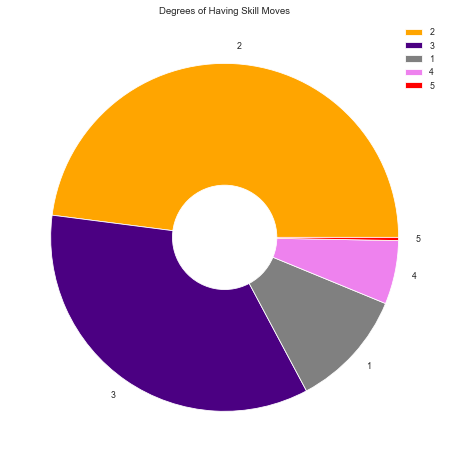

In [15]:
# distribution of skill moves
"""
1.0 = Min
2.0 = 25%
3.0 = 50%
4.0 = 75%
5.0 = Max
"""

sns.set_context('paper')
skill_moves_labels = data_fifa["SkillMoves"].value_counts().index #(1.0,2.0,3.0,4.0,5.0)
skill_moves_values = data_fifa["SkillMoves"].value_counts().values # values
colors = ['orange','indigo','grey','violet','red']

# visualize
# create a circle for the center of plot
plt.figure(figsize = (8,8))
circle = plt.Circle((0,0),0.3,color = "white") # we create a hole in the middle 
plt.pie(skill_moves_values, labels = skill_moves_labels, colors = colors)
p = plt.gcf()
p.gca().add_artist(circle) # we add the hole to the chart
plt.title("Degrees of Having Skill Moves")
plt.legend()
#plt.show()
plt.savefig('DonutChartSkillMove.png')

<a id ='29' ></a>
<h1 style = "background:lightblue;border:0"> Top 10 countries with the most footballers</h1>

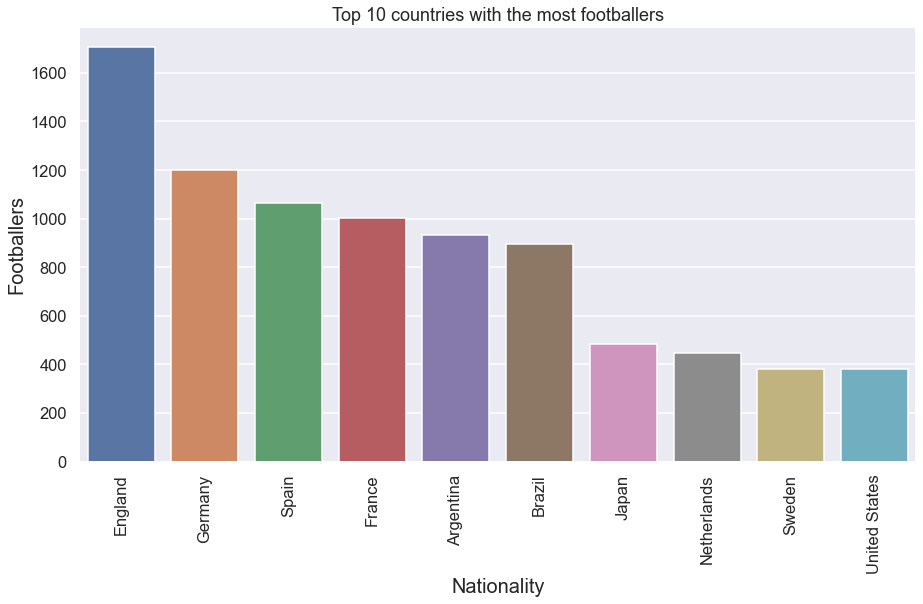

In [16]:
# problem : countries(10) with the most footballers
# Counter is a counter tool.Which country has how many players
newData = Counter(data_fifa["Nationality"])
# top 10 countries with most
most_countries = newData.most_common(10)
sns.set_context('talk')

x,y = zip(*most_countries)
x,y = list(x),list(y)

# visualize
plt.figure(figsize=(15,8))
plt.xticks(rotation= 90)#for making the text in x axis rotate to 90 degree so text wont overlap, It is good for easier understanding and 
#clarification of our graph by anyone
ax= sns.barplot(x=x, y=y, palette='deep') # x = Nationality, y = Footballers
plt.xlabel('Nationality', size = 20) # x-axis name
plt.ylabel('Footballers', size = 20 ) # y-axis name 
plt.title('Top 10 countries with the most footballers') # title
#plt.show()
plt.savefig('TopCountries.png')